In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file_path = '/Users/pietroghiotto/Desktop/NOVA BA/research methods for BA/group project/imdb_movies.csv'
# Try loading the CSV file with a different encoding
imdb_movies = pd.read_csv(file_path)


In [3]:
# Display the first few rows of the dataframe
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [4]:
imdb_movies.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

In [5]:
imdb_movies["date_x"]= pd.to_datetime(imdb_movies["date_x"])
imdb_movies.dtypes

In [6]:
imdb_movies.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [9]:
imdb_movies.dropna(inplace=True)
imdb_movies.isna().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [11]:
#check for duplicates 
print(imdb_movies.duplicated().sum())

0


In [12]:
imdb_movies.rename(columns={'date_x': 'release_date',
                            'budget_x': 'budget'},
                            inplace=True)

In [13]:
imdb_movies['income'] = (imdb_movies['revenue'] - imdb_movies['budget'])
imdb_movies.head()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,income
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1.966167e+08
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1.856795e+09
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,6.244590e+08
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2.190000e+07
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2.639420e+08


In [14]:
imdb_movies.describe()

,release_date,score,budget,revenue,income
count,10052,10052.00000,1.005200e+04,1.005200e+04,1.005200e+04
mean,2008-06-07 16:17:25.762037504,63.82700,6.412528e+07,2.512049e+08,1.870796e+08
min,1903-05-15 00:00:00,0.00000,1.000000e+00,0.000000e+00,-3.400000e+08
25%,2002-01-08 06:00:00,59.00000,1.439763e+07,2.768781e+07,5.560382e+06
50%,2013-04-10 00:00:00,65.00000,5.000000e+07,1.493288e+08,8.372964e+07
75%,2019-09-26 00:00:00,71.00000,1.040000e+08,4.161578e+08,3.146529e+08
max,2023-12-31 00:00:00,100.00000,4.600000e+08,2.923706e+09,2.686706e+09
std,NaN,12.78271,5.665852e+07,2.765495e+08,2.414404e+08


looking the minimum values of our variables:
- score = 0 has no significance for our analysis, 
- budget < 1000 we will assume that is a problem of data qulity, therefore we drop these values
- revenue < 1000 we make the same assumption as for budget

In [17]:
#printing the count of values that are below a certain threshold
print(imdb_movies[imdb_movies['score'] == 0].count())
print(imdb_movies[imdb_movies['revenue'] < 1000].count())
print(imdb_movies[imdb_movies['budget'] < 1000].count())


names           163
release_date    163
score           163
genre           163
overview        163
crew            163
orig_title      163
status          163
orig_lang       163
budget          163
revenue         163
country         163
income          163
dtype: int64
names           85
release_date    85
score           85
genre           85
overview        85
crew            85
orig_title      85
status          85
orig_lang       85
budget          85
revenue         85
country         85
income          85
dtype: int64
names           19
release_date    19
score           19
genre           19
overview        19
crew            19
orig_title      19
status          19
orig_lang       19
budget          19
revenue         19
country         19
income          19
dtype: int64


In [22]:
imdb_movies = imdb_movies[imdb_movies.score != 0]
imdb_movies = imdb_movies[imdb_movies.revenue >= 1000]
imdb_movies = imdb_movies[imdb_movies.budget >= 1000]
imdb_movies.describe()

,release_date,score,budget,revenue,income
count,9793,9793.000000,9.793000e+03,9.793000e+03,9.793000e+03
mean,2008-03-16 13:10:56.918206976,64.889717,6.243951e+07,2.551389e+08,1.926993e+08
min,1903-05-15 00:00:00,10.000000,2.000000e+03,1.242000e+03,-1.995488e+08
25%,2001-10-19 00:00:00,60.000000,1.450000e+07,2.892019e+07,8.270399e+06
50%,2012-12-06 00:00:00,66.000000,5.000000e+07,1.470804e+08,9.245786e+07
75%,2019-06-28 00:00:00,72.000000,1.020000e+08,4.257325e+08,3.244516e+08
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09,2.686706e+09
std,NaN,9.884499,5.421382e+07,2.787525e+08,2.418799e+08


we dropped roughly 300 rows out of the original 10,000

Text(0.5, 1.0, 'Number of movies produced by the top 10 countries')

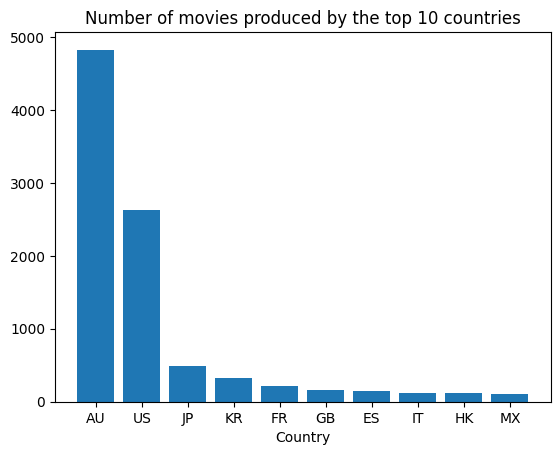

In [25]:
country = imdb_movies['country'].value_counts().head(10)
plt.bar(x=country.index, height=country)
plt.xlabel('Country')
plt.title('Number of movies produced by the top 10 countries')

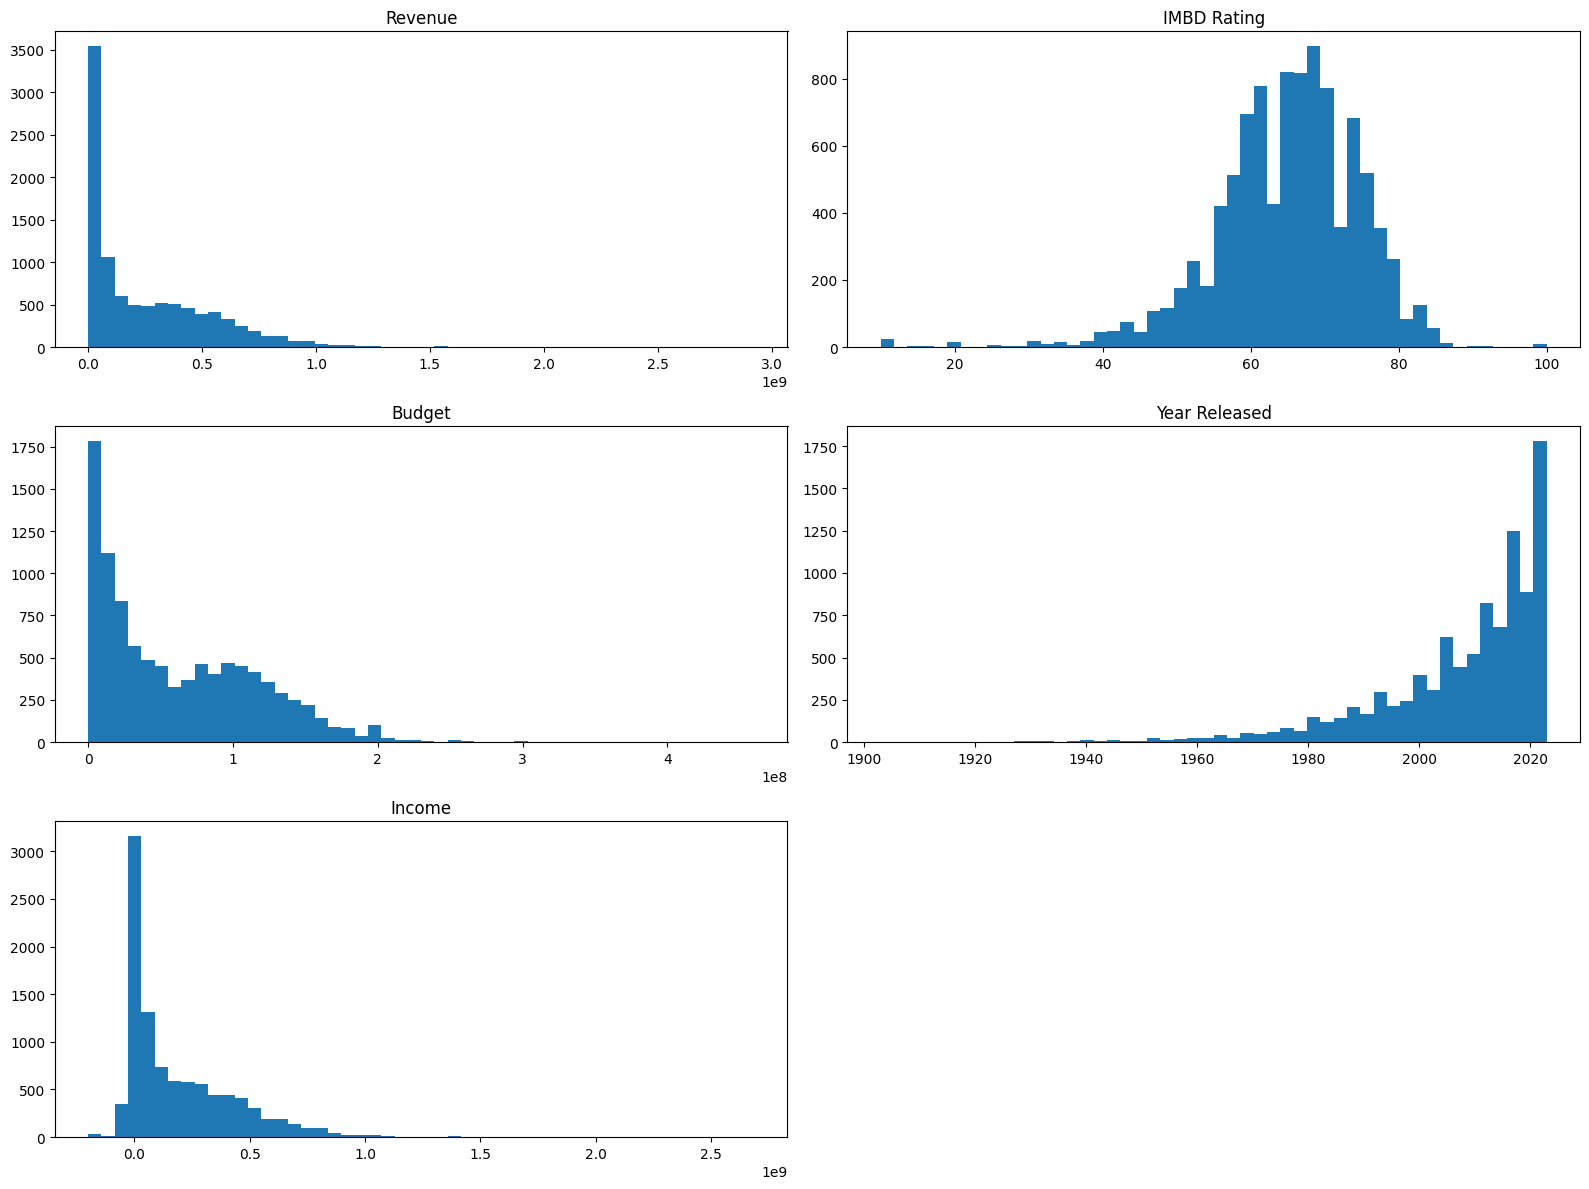

In [26]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(16, 12))
his1= imdb_movies['score']
his2= imdb_movies['budget']
his3= imdb_movies['revenue']
his4= imdb_movies['release_date'].dt.year
his5= imdb_movies['income']

axes[0,0].hist(his3, bins=50)
axes[0,0].set_title('Revenue')
axes[0,1].hist(his1, bins=50)
axes[0,1].set_title('IMBD Rating')
axes[1,0].hist(his2, bins=50)
axes[1,0].set_title('Budget')
axes[1,1].hist(his4, bins=50)
axes[1,1].set_title('Year Released')
axes[2,0].hist(his5, bins=50)
axes[2,0].set_title('Income')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

names                 object
date_x        datetime64[ns]
score                float64
genre                 object
overview              object
crew                  object
orig_title            object
status                object
orig_lang             object
budget_x             float64
revenue              float64
country               object
dtype: object

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

0


,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,1
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,1
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,1


,release_date,score,budget,revenue,profitable
count,10052,10052.00000,1.005200e+04,1.005200e+04,10052.000000
mean,2008-06-07 16:17:25.762037504,63.82700,6.412528e+07,2.512049e+08,0.802129
min,1903-05-15 00:00:00,0.00000,1.000000e+00,0.000000e+00,0.000000
25%,2002-01-08 06:00:00,59.00000,1.439763e+07,2.768781e+07,1.000000
50%,2013-04-10 00:00:00,65.00000,5.000000e+07,1.493288e+08,1.000000
75%,2019-09-26 00:00:00,71.00000,1.040000e+08,4.161578e+08,1.000000
max,2023-12-31 00:00:00,100.00000,4.600000e+08,2.923706e+09,1.000000
std,NaN,12.78271,5.665852e+07,2.765495e+08,0.398414


names           163
release_date    163
score           163
genre           163
overview        163
crew            163
orig_title      163
status          163
orig_lang       163
budget          163
revenue         163
country         163
profitable      163
dtype: int64
names           85
release_date    85
score           85
genre           85
overview        85
crew            85
orig_title      85
status          85
orig_lang       85
budget          85
revenue         85
country         85
profitable      85
dtype: int64
names           19
release_date    19
score           19
genre           19
overview        19
crew            19
orig_title      19
status          19
orig_lang       19
budget          19
revenue         19
country         19
profitable      19
dtype: int64


,release_date,score,budget,revenue,profitable
count,9793,9793.000000,9.793000e+03,9.793000e+03,9793.000000
mean,2008-03-16 13:10:56.918206976,64.889717,6.243951e+07,2.551389e+08,0.817421
min,1903-05-15 00:00:00,10.000000,2.000000e+03,1.242000e+03,0.000000
25%,2001-10-19 00:00:00,60.000000,1.450000e+07,2.892019e+07,1.000000
50%,2012-12-06 00:00:00,66.000000,5.000000e+07,1.470804e+08,1.000000
75%,2019-06-28 00:00:00,72.000000,1.020000e+08,4.257325e+08,1.000000
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09,1.000000
std,NaN,9.884499,5.421382e+07,2.787525e+08,0.386341
